In [1]:
pip install torch torchvision matplotlib kornia


Note: you may need to restart the kernel to use updated packages.


In [2]:
# If we are on colab: this clones the repo and installs the dependencies
from pathlib import Path

if Path.cwd().name != "LightGlue":
    !git clone --quiet https://github.com/cvg/LightGlue/
    %cd LightGlue
    !pip install --progress-bar off --quiet -e .

from lightglue import LightGlue, SuperPoint, DISK
from lightglue.utils import load_image, rbd
from lightglue import viz2d
import torch

torch.set_grad_enabled(False)
images = Path("assets")

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'mps', 'cpu'

extractor = SuperPoint(max_num_keypoints=2048).eval().to(device)  # load the extractor
matcher = LightGlue(features="superpoint").eval().to(device)

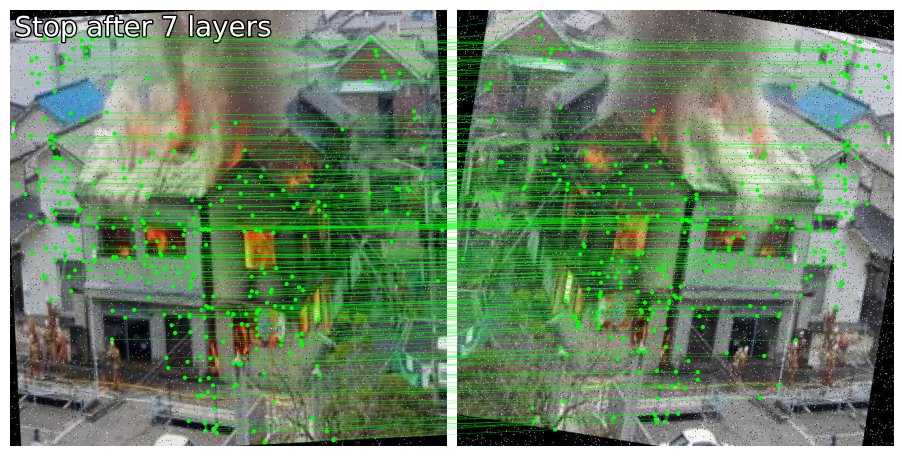

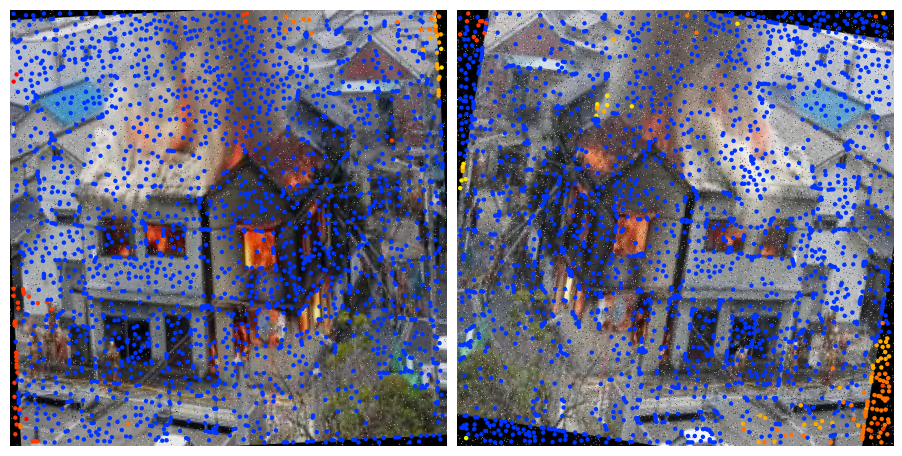

In [5]:
image0 = load_image(images / "Img_1805_jpg.rf.16641a4a6ad2e3820f08879b70e3bf7d.jpg")
image1 = load_image(images / "Img_1797_jpg.rf.e369f2f10a14ef3c73c83ee9824e702f.jpg")


feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers', fs=20)

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)

Number of Matches: 289
Elapsed Time: 1.29 seconds
GPU Memory Allocated: 63.38 MB
GPU Memory Reserved: 902.00 MB


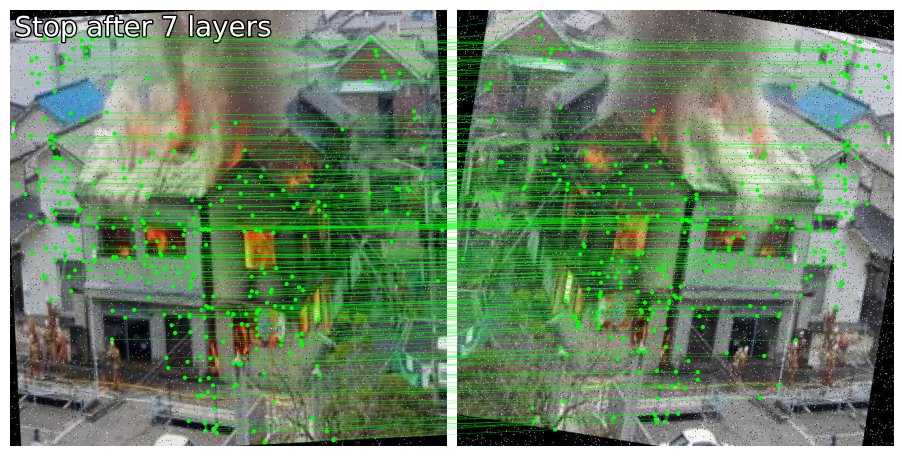

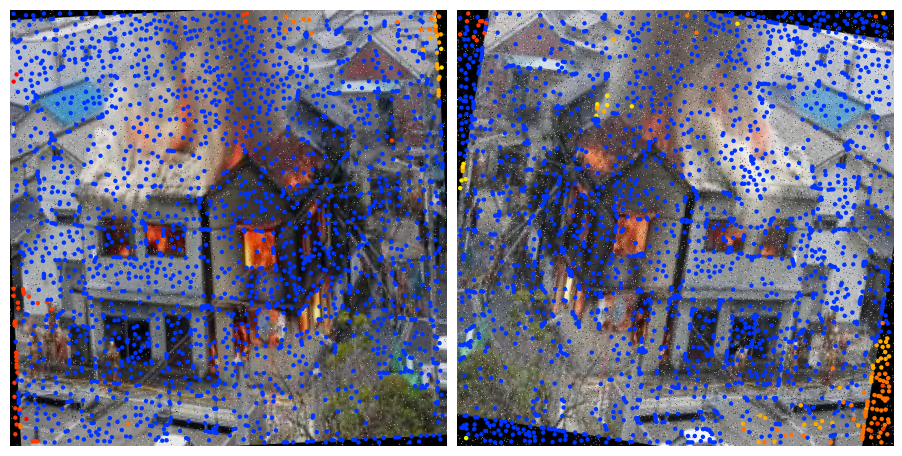

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from lightglue import LightGlue, SuperPoint
from lightglue.utils import load_image, rbd


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'mps', 'cpu'

extractor = SuperPoint(max_num_keypoints=2048).eval().to(device)  # load the extractor
matcher = LightGlue(features="superpoint").eval().to(device)
# טען את ה-Extractor ו-Matcher

# טען כל תמונה כ-torch.Tensor על ה-GPU עם צורת (3,H,W), נורמליזציה ב-[0,1]
image0 = load_image(images / "Img_1805_jpg.rf.16641a4a6ad2e3820f08879b70e3bf7d.jpg")
image1 = load_image(images / "Img_1797_jpg.rf.e369f2f10a14ef3c73c83ee9824e702f.jpg")

# מדידת זמן התחלה
start_time = time.time()

# חילוץ תכונות מקומיות
feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))

# התאמת התכונות
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

# מדידת זמן סיום
end_time = time.time()
elapsed_time = end_time - start_time

# מדידת צריכת GPU
gpu_memory_allocated = torch.cuda.memory_allocated() / (1024 ** 2)  # ב-MB
gpu_memory_reserved = torch.cuda.memory_reserved() / (1024 ** 2)    # ב-MB

# הצגת מספר נקודות ההתאמה
num_matches = len(matches)
print(f"Number of Matches: {num_matches}")

# המרת התמונות למערכים של NumPy

# ציור התמונות עם נקודות ההתאמה
axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers', fs=20)

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)

# הצגת המידע על זמן וצריכת GPU
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print(f"GPU Memory Allocated: {gpu_memory_allocated:.2f} MB")
print(f"GPU Memory Reserved: {gpu_memory_reserved:.2f} MB")


Number of Matches: 289
Elapsed Time for Feature Extraction: 0.13 seconds
Elapsed Time for Matching: 1.15 seconds


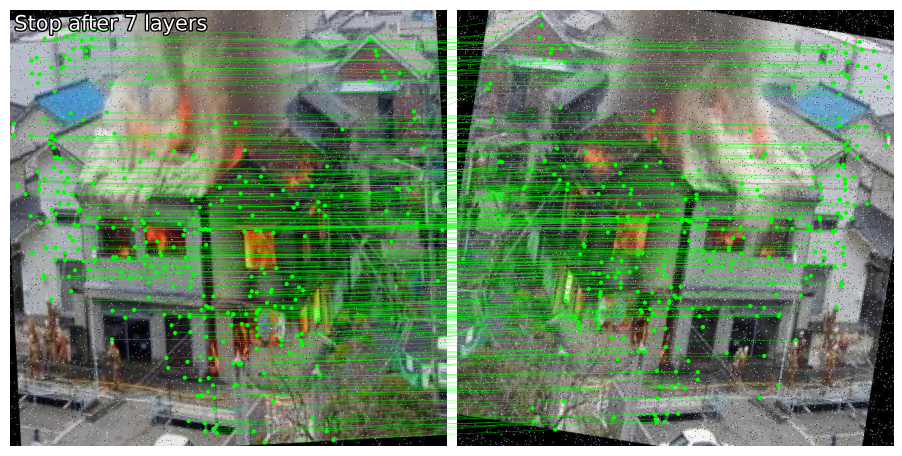

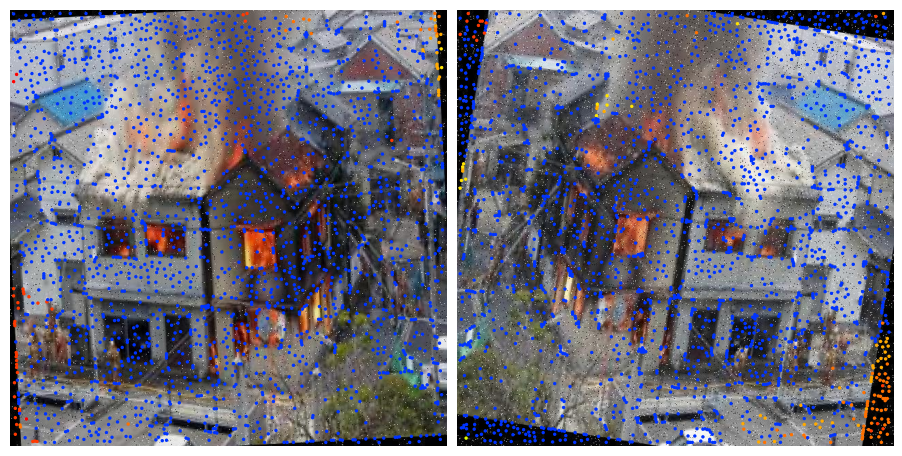

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from lightglue import LightGlue, SuperPoint
from lightglue.utils import load_image, rbd


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'mps', 'cpu'

extractor = SuperPoint(max_num_keypoints=2048).eval().to(device)  # load the extractor
matcher = LightGlue(features="superpoint").eval().to(device)
# טען את ה-Extractor ו-Matcher

# טען כל תמונה כ-torch.Tensor על ה-GPU עם צורת (3,H,W), נורמליזציה ב-[0,1]
image0 = load_image(images / "Img_1805_jpg.rf.16641a4a6ad2e3820f08879b70e3bf7d.jpg")
image1 = load_image(images / "Img_1797_jpg.rf.e369f2f10a14ef3c73c83ee9824e702f.jpg")
# מדידת זמן התחלה לחילוץ תכונות
start_time_feats = time.time()

# חילוץ תכונות מקומיות
feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))

# מדידת זמן סיום לחילוץ תכונות
end_time_feats = time.time()
elapsed_time_feats = end_time_feats - start_time_feats

# מדידת זמן התחלה להתאמת התכונות
start_time_matches = time.time()

# התאמת התכונות
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

# מדידת זמן סיום להתאמת התכונות
end_time_matches = time.time()
elapsed_time_matches = end_time_matches - start_time_matches

kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

# הצגת מספר נקודות ההתאמה
num_matches = len(matches)
print(f"Number of Matches: {num_matches}")

# ציור התמונות עם נקודות ההתאמה
axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers')

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=6)

# הצגת המידע על זמן התהליכים
print(f"Elapsed Time for Feature Extraction: {elapsed_time_feats:.2f} seconds")
print(f"Elapsed Time for Matching: {elapsed_time_matches:.2f} seconds")


Number of Matches: 289
Elapsed Time for Feature Extraction: 0.11 seconds
GPU Memory Used for Feature Extraction: 0.03 MB
Elapsed Time for Matching: 1.10 seconds
GPU Memory Used for Matching: 0.00 MB
Total GPU Memory Allocated: 62.45 MB


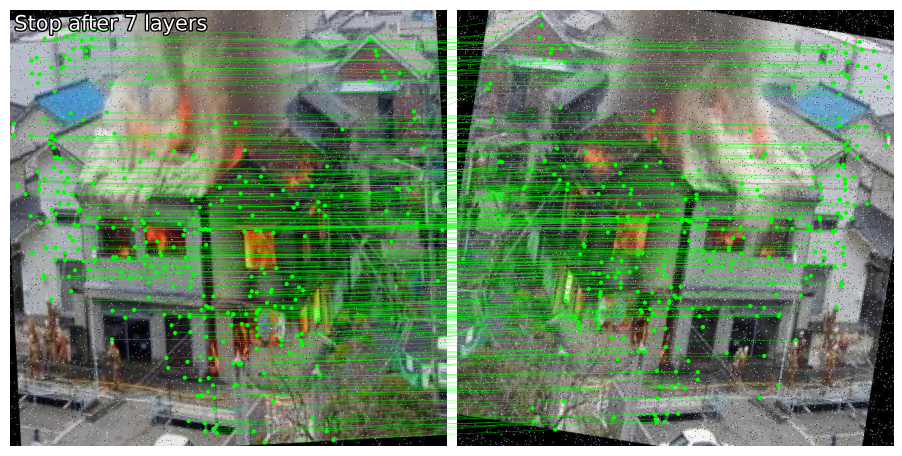

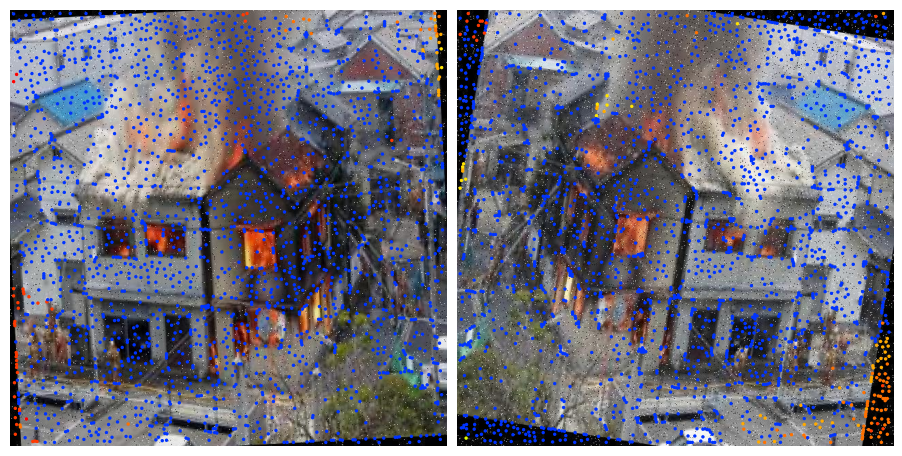

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from lightglue import LightGlue, SuperPoint
from lightglue.utils import load_image, rbd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'mps', 'cpu'

extractor = SuperPoint(max_num_keypoints=2048).eval().to(device)  # load the extractor
matcher = LightGlue(features="superpoint").eval().to(device)
# טען את ה-Extractor ו-Matcher

# טען כל תמונה כ-torch.Tensor על ה-GPU עם צורת (3,H,W), נורמליזציה ב-[0,1]
image0 = load_image(images / "Img_1805_jpg.rf.16641a4a6ad2e3820f08879b70e3bf7d.jpg")
image1 = load_image(images / "Img_1797_jpg.rf.e369f2f10a14ef3c73c83ee9824e702f.jpg")

# מדידת זמן וצריכת GPU לחילוץ תכונות
torch.cuda.empty_cache()  # ניקוי זיכרון GPU לפני מדידה
start_time_feats = time.time()
start_gpu_memory_feats = torch.cuda.memory_allocated() / (1024 ** 2)  # ב-MB

# חילוץ תכונות מקומיות
feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))

# מדידת זמן סיום לחילוץ תכונות
end_time_feats = time.time()
end_gpu_memory_feats = torch.cuda.memory_allocated() / (1024 ** 2)  # ב-MB
elapsed_time_feats = end_time_feats - start_time_feats
gpu_memory_feats = end_gpu_memory_feats - start_gpu_memory_feats

# מדידת זמן וצריכת GPU להתאמת התכונות
torch.cuda.empty_cache()  # ניקוי זיכרון GPU לפני מדידה
start_time_matches = time.time()
start_gpu_memory_matches = torch.cuda.memory_allocated() / (1024 ** 2)  # ב-MB

# התאמת התכונות
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

# מדידת זמן סיום להתאמת התכונות
end_time_matches = time.time()
end_gpu_memory_matches = torch.cuda.memory_allocated() / (1024 ** 2)  # ב-MB
elapsed_time_matches = end_time_matches - start_time_matches
gpu_memory_matches = end_gpu_memory_matches - start_gpu_memory_matches

kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

# הצגת מספר נקודות ההתאמה
num_matches = len(matches)
print(f"Number of Matches: {num_matches}")

# ציור התמונות עם נקודות ההתאמה
axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers')

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=6)

# מדידת הצריכה הכוללת של GPU
total_gpu_memory = torch.cuda.memory_allocated() / (1024 ** 2)  # ב-MB

# הצגת המידע על זמן התהליכים וצריכת GPU
print(f"Elapsed Time for Feature Extraction: {elapsed_time_feats:.2f} seconds")
print(f"GPU Memory Used for Feature Extraction: {gpu_memory_feats:.2f} MB")
print(f"Elapsed Time for Matching: {elapsed_time_matches:.2f} seconds")
print(f"GPU Memory Used for Matching: {gpu_memory_matches:.2f} MB")
print(f"Total GPU Memory Allocated: {total_gpu_memory:.2f} MB")
